# DNN : `IMDb`

## Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras import callbacks, layers, models
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

## 1. Data

### 1.1. Importation

On peut préciser :
* `num_words` : taille du dictionnaire retenu (avec les mots classés du plus fréquent au plus rarer),
* `skip_top` : nombre de mots ignorés parmi les plus fréquents.

IMDb gère les indices des tokens :
* `start_char` : indice du début d'une critique,
* `oov_char` : indice des mots inconnus ("out of vocabulary")
* `index_from` : indice du premier mot.

0 est l'indice du padding utilisé pour normaliser les longueurs des critiques.

In [2]:
num_words = 5000
skip_top  = 0

start_char   = 1
oov_char     = 2
index_from   = 3

(X_train_valid, y_train_valid), (X_test, y_test) = imdb.load_data(num_words  = num_words,
                                                                  skip_top   = skip_top,
                                                                  start_char = start_char,
                                                                  oov_char   = oov_char,
                                                                  index_from = index_from)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=1/5)

print('Dimensions de X_train :', X_train.shape)
print('Dimensions de X_valid :', X_valid.shape)
print('Dimensions de X_test  :', X_test.shape)

print('Dimensions de y_train :', y_train.shape)
print('Dimensions de y_valid :', y_valid.shape)
print('Dimensions de y_test  :', y_test.shape)

Dimensions de X_train : (20000,)
Dimensions de X_valid : (5000,)
Dimensions de X_test  : (25000,)
Dimensions de y_train : (20000,)
Dimensions de y_valid : (5000,)
Dimensions de y_test  : (25000,)


### 1.2. Décodage des critiques

In [3]:
word_index = imdb.get_word_index()

nb_words = 10

for word, index in list(word_index.items())[:nb_words]:
    print(f'{word}: {index}')

fawn: 34701
tsukino: 52006
nunnery: 52007
sonja: 16816
vani: 63951
woods: 1408
spiders: 16115
hanging: 2345
woody: 2289
trawling: 52008


In [4]:
index_to_word = {index: word for word, index in word_index.items()}
sorted_words = sorted(index_to_word.items())

for index, word in sorted_words[:nb_words]:
    print(f"{index}: {word}")

1: the
2: and
3: a
4: of
5: to
6: is
7: br
8: in
9: it
10: i


In [5]:
print(X_train[0])

[1, 4, 931, 34, 2, 300, 1936, 4, 2, 4423, 23, 4, 419, 18, 14, 2803, 7, 6, 2081, 21, 12, 9, 6, 2, 8, 106, 1024, 2, 2, 5, 837, 422, 4, 3734, 23, 4, 681, 837, 26, 1670, 18, 51, 988, 127, 14, 123, 62, 30, 6, 87, 2, 23, 4490, 42, 1168, 248, 5, 12, 127, 967, 6, 171, 381, 18, 31, 829, 42, 38, 8, 67, 2, 37, 186, 8, 28, 623, 1250, 8, 162, 2, 726, 11, 6, 217, 42, 17, 309, 21, 4, 232, 9, 163, 10, 10, 4, 539, 37, 26, 11, 4, 2, 3798, 19, 4, 500, 2, 2, 80, 30, 184, 76, 46, 7, 1996, 54, 14, 2803, 9, 2, 894, 50, 9, 6, 2, 7, 4, 2, 6, 140, 140, 512, 19, 6, 2, 4659, 18, 2, 185, 372, 8, 837, 11, 2, 2, 280, 53, 10, 10, 13, 296, 4, 86, 2, 37, 16, 616, 5, 1227, 2, 74, 6, 1208, 246, 143, 2099, 1996, 2529, 245, 19, 6, 2, 2, 42, 38, 4, 333, 2, 643, 53, 1089, 21, 2, 30, 2042, 8, 3235, 300, 1782, 23, 2, 188, 2, 34, 4, 3155, 63, 3443, 2, 6, 318, 888, 63, 29, 161, 124, 5, 2, 317, 19, 2, 10, 10, 14, 2, 7, 500, 287, 63, 2, 5, 518, 1344, 1058, 2, 8, 2905, 3574, 26, 3397, 6, 706, 781, 444, 8, 589, 8, 2, 797, 60, 48, 4,

In [6]:
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

print(decode_review(X_train[0]))

the of sounds who and later monsters of and user are of yes but as julie br is 80s not that it is and in character attempts and and to third title of soviet are of apparently third he 40 but when masterpiece end as ever story at is him and are oz it's van day to that end business is again mean but by leads it's her in can and like horror in one released adaptation in actually and similar this is almost it's movie high not of feel it makes i i of decent like he this of and wannabe film of b and and into at around get some br continues no as julie it and superb more it is and br of and is through through soon film is and purchased but and got next in third this and and true up i i was plays of how and like with sad to steve and been is tough worst i'm thomas continues frightening tv film is and and it's her of father and cool up fear not and at african in protagonists later paced are and can't and who of courage really world's and is excellent 20 really all nothing does to and half film 

### 1.3. Statistiques

In [7]:
review_lengths = [len(review) for review in X_train]

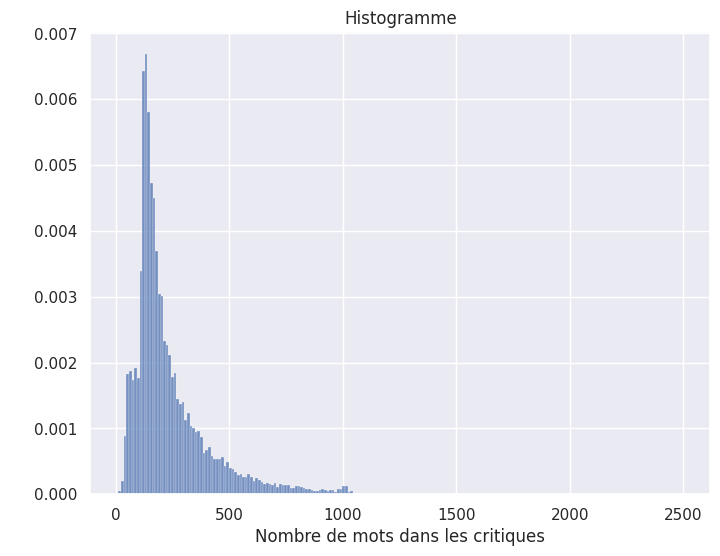

In [8]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(x=review_lengths, stat='density', kde=False)
ax.set_xlabel('Nombre de mots dans les critiques')
ax.set_ylabel(' ')
ax.set_title('Histogramme')
plt.show()

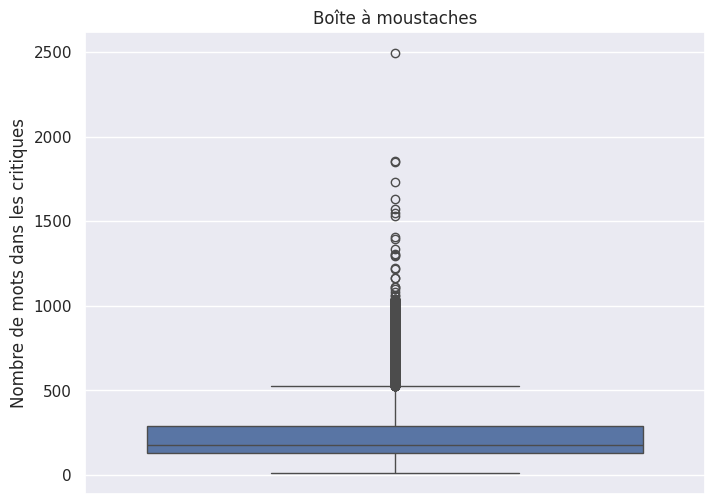

In [9]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(y=review_lengths)
ax.set_ylabel('Nombre de mots dans les critiques')
ax.set_title('Boîte à moustaches')
plt.show()

### 1.4. Padding

In [10]:
print('Exemple de critique avant padding :', X_train[0])
print('Longueur :', len(X_train[0]))

max_review_length = 500

X_train_pad = pad_sequences(X_train, maxlen=max_review_length, padding='post', truncating='post')
X_test_pad  = pad_sequences(X_test, maxlen=max_review_length, padding='post', truncating='post')

print('Exemple de critique après padding :', X_train_pad[0])
print('Longueur :', len(X_train_pad[0]))

Exemple de critique avant padding : [1, 4, 931, 34, 2, 300, 1936, 4, 2, 4423, 23, 4, 419, 18, 14, 2803, 7, 6, 2081, 21, 12, 9, 6, 2, 8, 106, 1024, 2, 2, 5, 837, 422, 4, 3734, 23, 4, 681, 837, 26, 1670, 18, 51, 988, 127, 14, 123, 62, 30, 6, 87, 2, 23, 4490, 42, 1168, 248, 5, 12, 127, 967, 6, 171, 381, 18, 31, 829, 42, 38, 8, 67, 2, 37, 186, 8, 28, 623, 1250, 8, 162, 2, 726, 11, 6, 217, 42, 17, 309, 21, 4, 232, 9, 163, 10, 10, 4, 539, 37, 26, 11, 4, 2, 3798, 19, 4, 500, 2, 2, 80, 30, 184, 76, 46, 7, 1996, 54, 14, 2803, 9, 2, 894, 50, 9, 6, 2, 7, 4, 2, 6, 140, 140, 512, 19, 6, 2, 4659, 18, 2, 185, 372, 8, 837, 11, 2, 2, 280, 53, 10, 10, 13, 296, 4, 86, 2, 37, 16, 616, 5, 1227, 2, 74, 6, 1208, 246, 143, 2099, 1996, 2529, 245, 19, 6, 2, 2, 42, 38, 4, 333, 2, 643, 53, 1089, 21, 2, 30, 2042, 8, 3235, 300, 1782, 23, 2, 188, 2, 34, 4, 3155, 63, 3443, 2, 6, 318, 888, 63, 29, 161, 124, 5, 2, 317, 19, 2, 10, 10, 14, 2, 7, 500, 287, 63, 2, 5, 518, 1344, 1058, 2, 8, 2905, 3574, 26, 3397, 6, 706, 781

### 1.5. Encodage

In [11]:
def one_hot_encoder(x, num_words):
    x_encoded = np.zeros((len(x), num_words), dtype=np.float32)

    for i, sentence in enumerate(x):
        for word in sentence:
            x_encoded[i, word] = 1.

    return x_encoded

In [12]:
X_train = one_hot_encoder(X_train, num_words=num_words)
X_valid = one_hot_encoder(X_valid, num_words=num_words)
X_test  = one_hot_encoder(X_test, num_words=num_words)

print('Exemple de revue encodée', X_train[0])

Exemple de revue encodée [0. 1. 1. ... 0. 0. 0.]


In [13]:
print('Exemple de revue amendée', X_train[0])

Exemple de revue amendée [0. 1. 1. ... 0. 0. 0.]


## 2. DNN

### 2.1. Architecture

In [14]:
dim_inputs = X_train.shape[1]
dim_outputs = 1

nb_units_layer1 = 20
nb_units_layer2 = 20

dropout_layer1 = 0.2
dropout_layer2 = 0.2

model = models.Sequential(name='DNN')

model.add(layers.Input((dim_inputs,), name='Inputs'))

model.add(layers.Dense(nb_units_layer1, activation='relu', name='Hidden_layer_1'))
model.add(layers.Dropout(dropout_layer1, name='Dropout_Hidden_layer_1'))

model.add(layers.Dense(nb_units_layer2, activation='relu', name='Hidden_layer_2'))
model.add(layers.Dropout(dropout_layer2, name='Dropout_Hidden_layer_2'))

model.add(layers.Dense(dim_outputs, activation='sigmoid', name='Output_layer'))

model.summary()

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden_layer_1 (Dense)               │ (None, 20)                  │         100,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Hidden_layer_1 (Dropout)     │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_2 (Dense)               │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_Hidden_layer_2 (Dropout)     │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_layer (Dense)                 │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,461 (392.43 KB)

 Trainable params: 100,461 (392.43 KB)

 Non-trainable params: 0 (0.00 B)

### 2.2. Entraînement

In [15]:
model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

callback = callbacks.EarlyStopping(monitor              = 'val_loss',
                                   mode                 = 'min',
                                   patience             = 20,
                                   restore_best_weights = True)

hist = model.fit(X_train,
                 y_train,
                 batch_size      = 500,
                 epochs          = 100,
                 validation_data = (X_valid, y_valid),
                 callbacks       = [callback],
                 verbose         = 1)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6216 - loss: 0.6471 - val_accuracy: 0.8474 - val_loss: 0.4175
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8505 - loss: 0.3965 - val_accuracy: 0.8800 - val_loss: 0.3123
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8981 - loss: 0.2798 - val_accuracy: 0.8810 - val_loss: 0.2908
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9243 - loss: 0.2164 - val_accuracy: 0.8826 - val_loss: 0.2903
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9346 - loss: 0.1919 - val_accuracy: 0.8810 - val_loss: 0.3056
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9418 - loss: 0.1624 - val_accuracy: 0.8790 - val_loss: 0.3205
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9545 - loss: 0.1390 - val_accuracy: 0.8776 - val_loss: 0.3370
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9643 - loss: 0.1141 - val_accuracy: 0.

### 2.3. Prévisions

In [16]:
y_test_pred = model.predict(X_test)

score_test = model.evaluate(X_test, y_test, verbose=0)
print(f'Entropie test   : {score_test[0]:4.4f}')
print(f'Exactitude test : {score_test[1]:4.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Entropie test   : 0.2866
Exactitude test : 0.8816
